# Importing libraries #

In [46]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder


# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings for Pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)  # Show more rows

# Importing dataset and visualizing data

In [48]:
# Load the dataset (make sure to replace 'your_file_name.csv' with the actual file name)
df = pd.read_csv("C:/Users/LENOVO/Downloads/diabetes.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Outlier Treatment

In [58]:
#the values of Glucose, Blood Pressure, Skin thickness, Insulin, and BMI cannot be zero. In such cases, we can replace them with a median as the data is skewed.
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace_zeros:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

In [60]:
# values of Insulin and diabetes pedigree function are extreme. So it can be fixed by IQR capping.
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

# Apply IQR capping to 'Insulin' and 'DiabetesPedigreeFunction'
cap_outliers(df, 'Insulin')
cap_outliers(df, 'DiabetesPedigreeFunction')

# Box Plot After Outlier Treatment

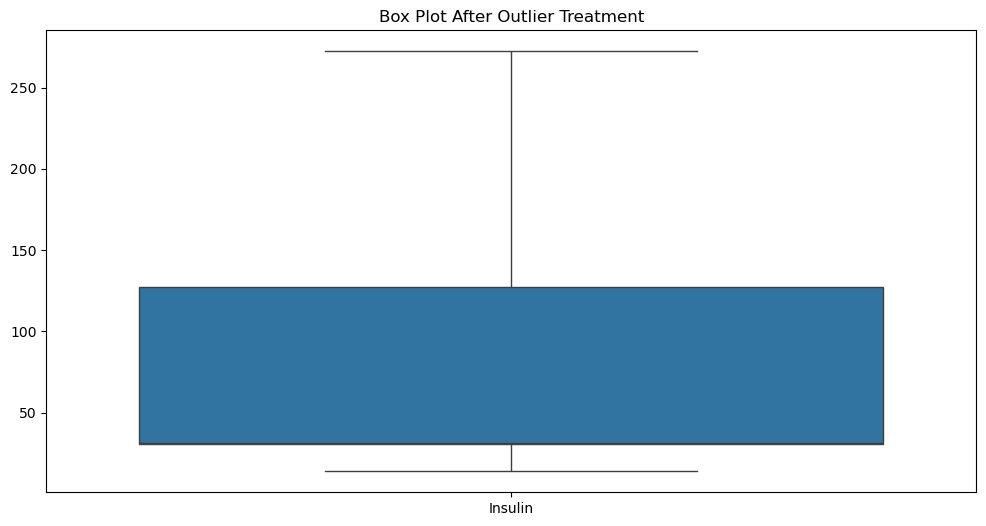

In [62]:
# Box Plotting for variable Insulin
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Insulin']])
plt.title("Box Plot After Outlier Treatment")
plt.show()

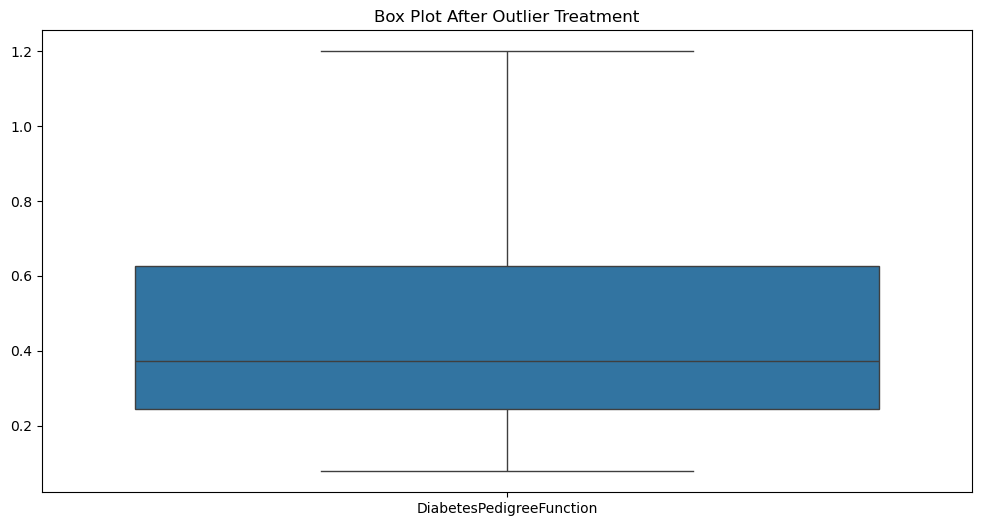

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['DiabetesPedigreeFunction']])
plt.title("Box Plot After Outlier Treatment")
plt.show()

## Findings ##
The box plot suggests the outlier treatment significantly addressed the extreme values of insulin and helped in a more stabilized dataset. 

# Data distribution visualization

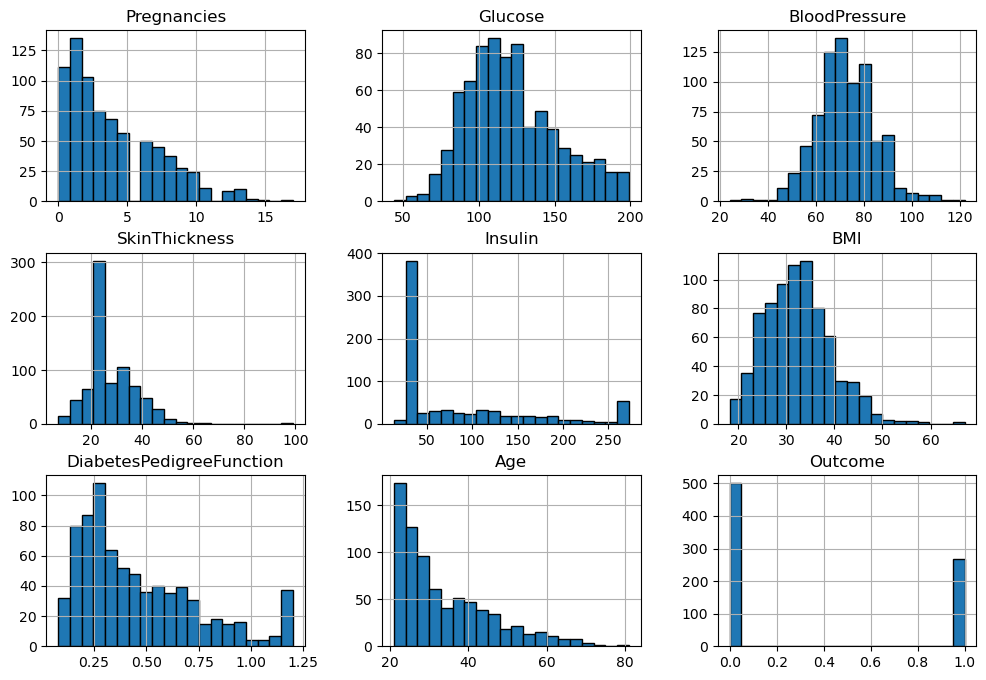

In [66]:
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.show()

## findings ##
Pregnancy: The majority of the samples have fewer pregnancies.

Glucose: There is higher frequency in low to moderate glucose levels.

Skin Thickness: The majority has a skin thickness of 20-30mm and a sharp drop after 40mm.

Insulin: Most individuals have insulin levels below 100.

BMI: A balanced spread of BMI values.

Diabetes Pedigree Function: Most scores are concentrated towards lower values.

Age: Samples are more of the young.ve diabetes.


# Pair plot for variable relationship

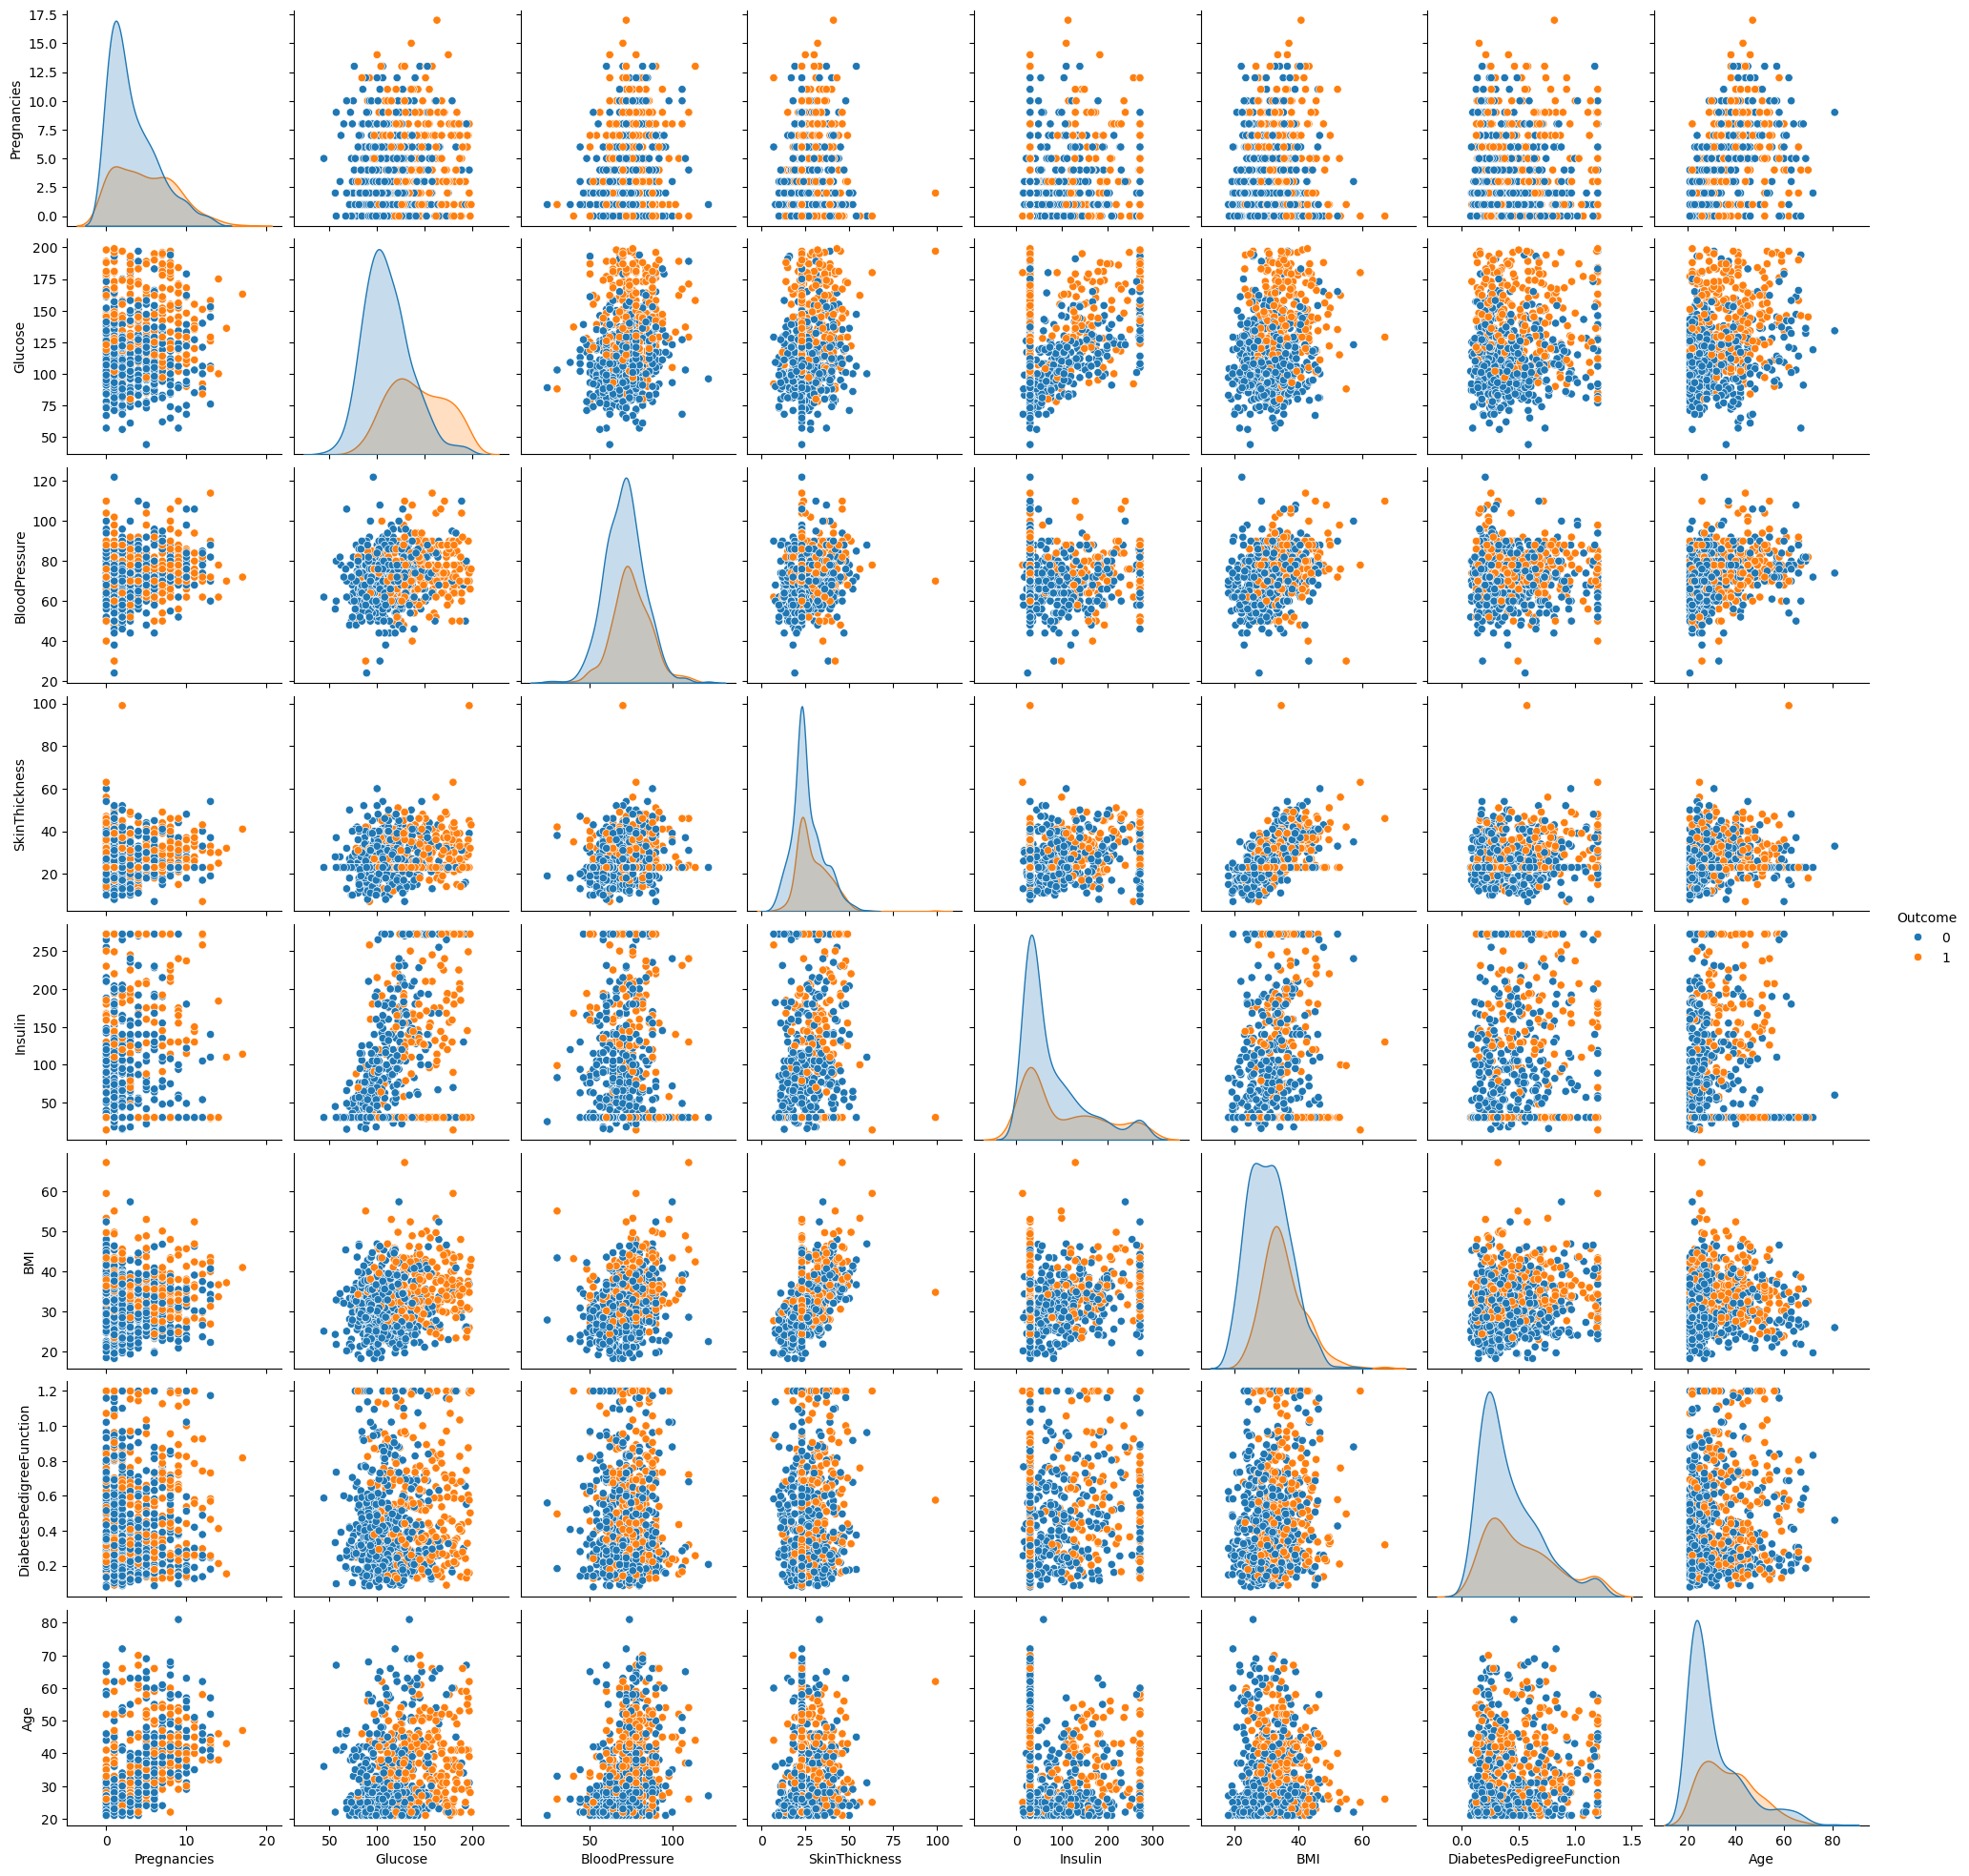

In [68]:
sns.pairplot(df, hue="Outcome")
plt.show()

## findings ##
Pregnancy: A higher number of diabetes patients tend to have a higher number of pregnancies.

Glucose: An increase in glucose levels in diabetes patients suggests correct data.

Blood Pressure: BP also tends to differentiate well from the outcome, indicating a higher value with a positive outcome, which is already proven.

Skin Thickness: Higher skin thickness also tends to have a higher likelihood of positive outcomes (diabetes).

Insulin: Diabetes individuals have insulin levels above 100.

BMI: A higher BMI is an indication of the presence of diabetes.

Diabetes Pedigree Function: A positive correlation is found with diabetes.

Age: Old individuals tend to show a higher incidence of diabetes.

# Correlation Matrix

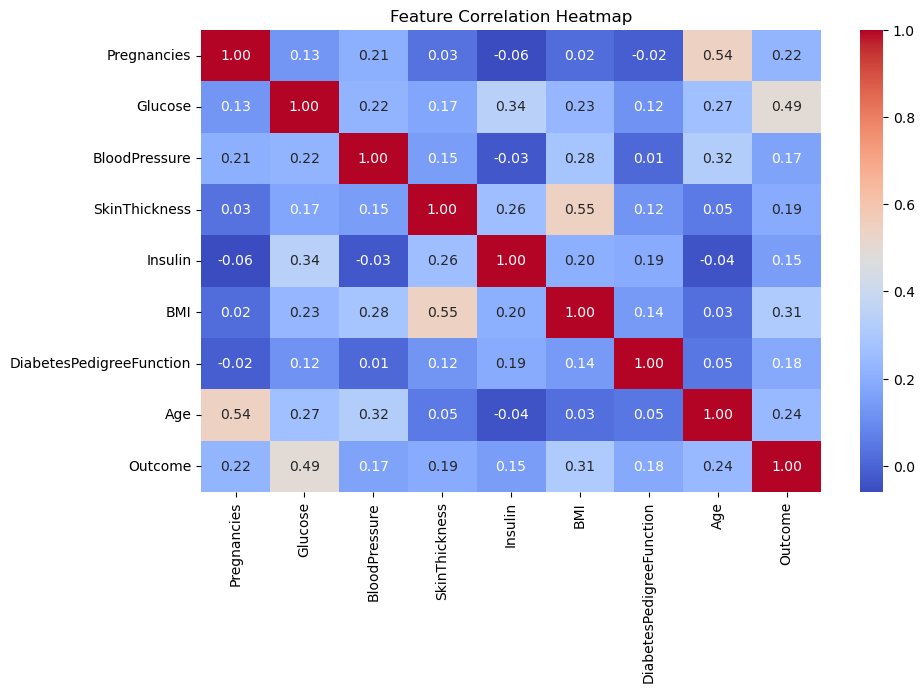

In [69]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Significant findings
Glucose and Outcome (0.49): A strong positive correlation, indicating higher glucose levels are associated with a higher likelihood of diabetes.

BMI and Skin Thickness (0.55): This correlation suggests that individuals with a higher BMI tend to have greater skin thickness, which is a potential indicator of insulin resistance.

Insulin (and BMI) Correlations: Insulin significantly correlates with BMI (0.55), implying that higher insulin levels tend to be associated with higher BMI.

Outcome and Age (0.24): A weak positive correlation, indicating that older age is somewhat related to a higher likelihood of the diabetes outcome.

Insulin and Glucose (0.34): Indicates a positive relationship, suggesting that higher insulin levels may be related to elevated glucose levels.

Diabetes Pedigree Function and Outcome (0.18): A weak positive correlation, suggesting that a higher diabetes pedigree score may relate slightly to a higher likelihood of diabetes.


# Univariate and Bivariate Analysis

## Distribution of outcome variable

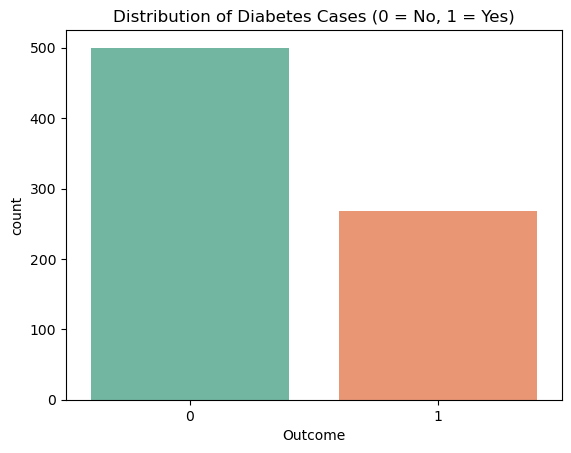

In [70]:
sns.countplot(x=df["Outcome"], palette="Set2")
plt.title("Distribution of Diabetes Cases (0 = No, 1 = Yes)")
plt.show()

### findings
There is a more significant disparity between counts of diabetes and non-diabetes cases.

## Handling class imbalance

In [74]:
#importing imbalanced learn for handling class imbalance
from imblearn.over_sampling import SMOTE

In [76]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df.drop(columns=["Outcome"])  # Exclude target variable
y = df["Outcome"]  # Target variable

# Apply SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Convert back to DataFrame
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote["Outcome"] = y_smote

# Check class balance after SMOTE
print(df_smote["Outcome"].value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


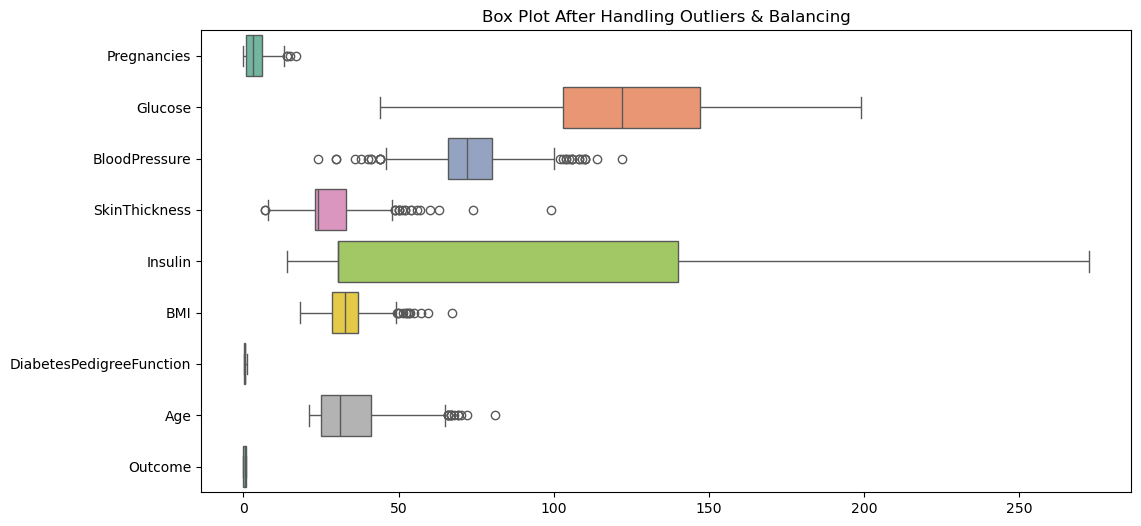

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_smote, orient="h", palette="Set2")
plt.title("Box Plot After Handling Outliers & Balancing")
plt.show()

In [80]:
# Kolmogorov-Smirnov (KS) Test (to find if the two distributions are statistically different)
from scipy.stats import ks_2samp

for col in X.columns:
    stat, p_value = ks_2samp(df[col], df_smote[col])
    print(f"{col}: KS Test p-value = {p_value:.4f}")

Pregnancies: KS Test p-value = 0.9522
Glucose: KS Test p-value = 0.0709
BloodPressure: KS Test p-value = 0.8860
SkinThickness: KS Test p-value = 0.9108
Insulin: KS Test p-value = 0.6455
BMI: KS Test p-value = 0.1140
DiabetesPedigreeFunction: KS Test p-value = 0.2776
Age: KS Test p-value = 0.0725


### findings
Since all p-values > 0.05, can safely conclude that the distribution of features before and after SMOTE is statistically similar.

## Distribution of each variable

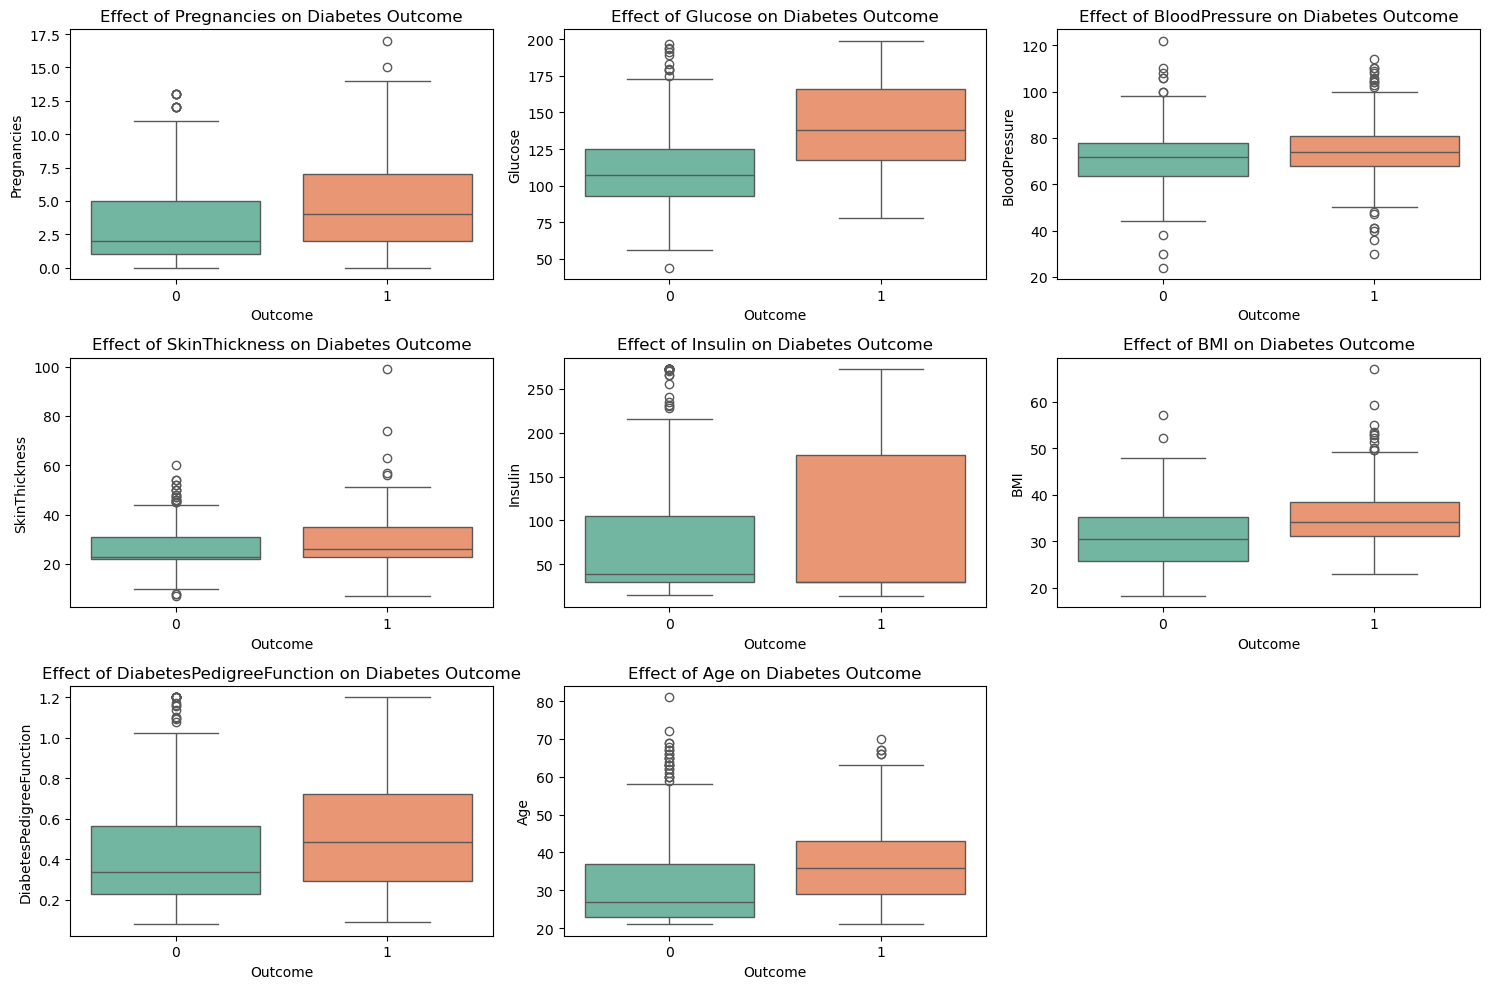

In [82]:
# Plot all numerical variables against Outcome
plt.figure(figsize=(15,10))
for i, col in enumerate(df_smote.drop(columns=["Outcome"]).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_smote["Outcome"], y=df_smote[col], palette="Set2")
    plt.title(f"Effect of {col} on Diabetes Outcome")
plt.tight_layout()
plt.show()

### findings
Pregnancies: The median number of pregnancies for non-diabetic individuals (0) is lower than for diabetic individuals.

Glucose: Diabetic individuals exhibit significantly higher glucose levels than non-diabetic individuals, evidenced by the higher median and a wider range.

BP: Similar to glucose, the median blood pressure significantly differs, with diabetic individuals presenting higher values.

Skin Thickness: The skin thickness is notably lower in non-diabetic individuals than in diabetic individuals, with a higher median for the latter.

Insulin: Insulin levels are substantially higher for diabetic individuals. The median is significantly shifted upwards compared to non-diabetic individuals.

BMI: Diabetic individuals have higher BMI values than their non-diabetic counterparts, as shown by the higher median.

Diabetes Pedigree Function: The values are similar for both groups, but the median for diabetic individuals is slightly higher, indicating that family history may play a role.

Age: Diabetic individuals tend to be older than non-diabetic individuals, as indicated by the higher median age in the diabetic group. There are some outliers, especially among the diabetic group, suggesting that older individuals may contribute to variability.

The consistent pattern across multiple features shows that diabetic individuals generally exhibit higher values in critical health metrics such as glucose, insulin, BMI, and age.d age.



## Correlation of variables with the outcome

,Feature,Correlation with Outcome,Strength
1,Glucose,0.492782,Moderate
5,BMI,0.312249,Moderate
7,Age,0.238356,Weak
0,Pregnancies,0.221898,Weak
3,SkinThickness,0.189065,Weak
6,DiabetesPedigreeFunction,0.184969,Weak
2,BloodPressure,0.165723,Weak
4,Insulin,0.147295,Weak


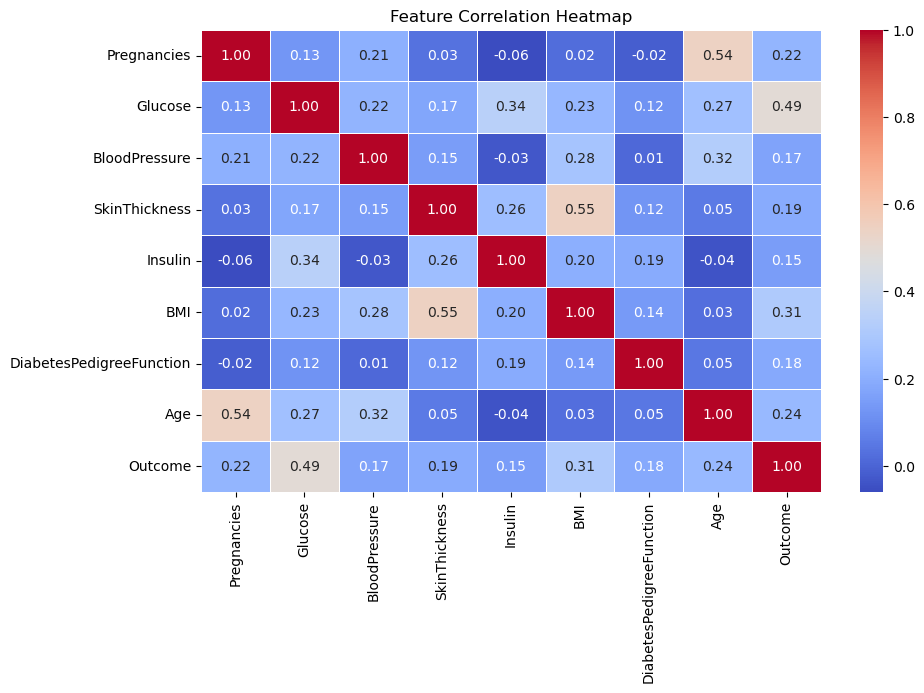

In [84]:
# Compute correlation with Outcome
correlation = df.corr()["Outcome"].drop("Outcome")  # Drop self-correlation

# Convert to DataFrame and categorize strength
correlation_df = pd.DataFrame(correlation).reset_index()
correlation_df.columns = ["Feature", "Correlation with Outcome"]
correlation_df["Strength"] = correlation_df["Correlation with Outcome"].apply(
    lambda x: "Strong" if abs(x) > 0.5 else "Moderate" if abs(x) > 0.3 else "Weak"
)

# Display Table
display(correlation_df.sort_values(by="Correlation with Outcome", ascending=False))  # Works in Jupyter Notebook

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### findings
Glucose (0.49) has the strongest correlation with diabetes, though still in the moderate range.

BMI (0.31) is also moderately correlated, indicating that higher BMI is linked to diabetes risk.
    
Age (0.24), Pregnancies (0.22), and others show weak correlations, meaning they contribute but are not primary predictors.
    
Blood Pressure, Insulin, Skin Thickness, and Pedigree Function have relatively lower correlations.

## T-Test (Mean Difference for Each Feature)

In [86]:
# to find the degree of independence
from scipy.stats import ttest_ind

for col in df_smote.drop(columns=["Outcome"]).columns:
    diabetic = df_smote[df_smote["Outcome"] == 1][col]
    non_diabetic = df_smote[df_smote["Outcome"] == 0][col]
    
    t_stat, p_value = ttest_ind(diabetic, non_diabetic)
    print(f"{col}: p-value = {p_value:.4f}")

Pregnancies: p-value = 0.0000
Glucose: p-value = 0.0000
BloodPressure: p-value = 0.0000
SkinThickness: p-value = 0.0000
Insulin: p-value = 0.0000
BMI: p-value = 0.0000
DiabetesPedigreeFunction: p-value = 0.0000
Age: p-value = 0.0000


### findings
All variable plays a significant role in differentiating between the two groups.

## TASK 1

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [94]:
## Train and test spl
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# 1. Split data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# 2. Models
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)


In [100]:
# 3. Fit & Predict
models = {'Logistic Regression': lr, 'KNN': knn, 'Random Forest': rf}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7727
KNN Accuracy: 0.6623
Random Forest Accuracy: 0.7468


### findings
-Logistic Regression performed slightly better than Random Forest and significantly better than KNN.
-KNN's lower accuracy could be due to the unscaled data (distance-based models like KNN are sensitive to scale).

## TASK 2

In [102]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [104]:
# Define scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Models
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

models = {
    'Logistic Regression': lr,
    'KNN': knn,
    'Random Forest': rf
}

# To store results
results = []

for scaler_name, scaler in scalers.items():
    print(f"\n🔹 Using {scaler_name}")
    
    # Fit and transform
    X_scaled = scaler.fit_transform(X)
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train_s, y_train_s)
        y_pred = model.predict(X_test_s)
        acc = accuracy_score(y_test_s, y_pred)
        
        print(f"{model_name} Accuracy: {acc:.4f}")
        results.append({
            "Scaler": scaler_name,
            "Model": model_name,
            "Accuracy": acc
        })

# Create a results DataFrame
results_df = pd.DataFrame(results)


🔹 Using MinMaxScaler
Logistic Regression Accuracy: 0.7857
KNN Accuracy: 0.7208
Random Forest Accuracy: 0.7532

🔹 Using StandardScaler
Logistic Regression Accuracy: 0.7727
KNN Accuracy: 0.7208
Random Forest Accuracy: 0.7532


## findings
MinMaxScaler + Logistic Regression gave the best accuracy overall (0.7727).

KNN improved significantly from 0.6558 (no scaling) to 0.7468 with scaling.

Random Forest remains relatively stable across scalers, as expected (since it's not distance-based).



Glucose                     0.266683
BMI                         0.167316
Age                         0.137326
DiabetesPedigreeFunction    0.122306
BloodPressure               0.090176
Pregnancies                 0.076701
Insulin                     0.071849
SkinThickness               0.067643
dtype: float64


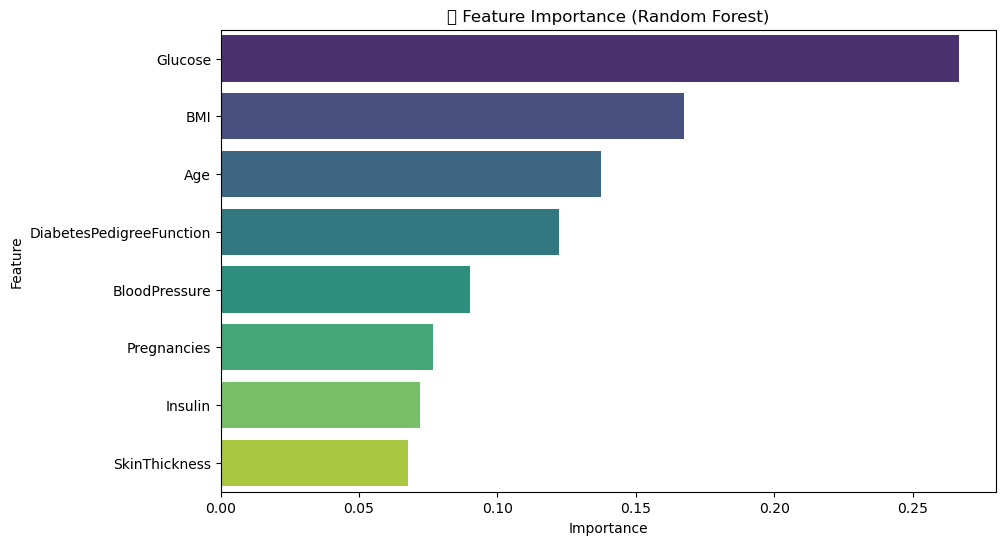

In [106]:
# Refit RF on Standard Scaled data
rf.fit(X_train_s, y_train_s)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features as table
print(importances)

# Optional: Heatmap of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("🔍 Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

##  Feature Importance – Random Forest Classifier

After applying StandardScaler and fitting the Random Forest model, the following features were found to be most influential in predicting diabetes:

| Rank | Feature                   | Importance Score | Interpretation        |
|------|---------------------------|------------------|-----------------------|
| 1    | **Glucose**               | 0.2649           | Most important         |
| 2    | **BMI**                   | 0.1633           | Strong contributor     |
| 3    | **Age**                   | 0.1410           | Moderate contribution  |
| 4    | **DiabetesPedigreeFunction** | 0.1224       | Moderate               |
| 5    | **BloodPressure**         | 0.0892           | Weak                   |
| 6    | **Insulin**               | 0.0778           | Weak                   |
| 7    | **Pregnancies**           | 0.0750           | Weak                   |
| 8    | **SkinThickness**         | 0.0664           | Least important        |

Glucose is the strongest indicator of diabetes, followed by BMI and Age.


In [110]:
#2. Model
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

In [112]:
#3. Fit & Predict
models = {'Logistic Regression': lr, 'KNN': knn, 'Random Forest': rf}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7727
KNN Accuracy: 0.6623
Random Forest Accuracy: 0.7468


## Pipeline for interactive input based prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Build the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# User input
print(" Enter patient details below:")
features = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]
input_values = []

for feature in features:
    value = float(input(f"{feature}: "))
    input_values.append(value)

# Convert to array and reshape for prediction
new_data = np.array(input_values).reshape(1, -1)

# Predict
prediction = pipeline.predict(new_data)

# Output result
print("\n Predicted Outcome:", "Diabetic " if prediction[0] == 1 else "Non-Diabetic ")

 Enter patient details below:
